<a href="https://colab.research.google.com/github/julcastaneda11-stack/Parcial-3-Parte-Practica-/blob/main/PARTE_PR%C3%81CTICA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats



$$ \Huge \textbf{ESTADÍSTICA DESCRIPTIVA} \\
\Large \text{EN LENGUAJE PYTHON} \\
\large \text{(Parte III parcial)}
$$




Integrantes:

*   Marisol Mejia Marlo-2230130
*   Isabella Herrera Hernández-22320130
*   Astrid Yesenia Porras Villamizar-2230127
* Cristian Andrés Castellanos Macías-2222648



Este trabajo tiene como objetivo realizar un análisis preliminar de dos factores: el "tiempo de gestación" (T_GES) y la "talla de nacimiento" (TALLA_NAC), centrándose en los bebés nacidos vivos registrados en Colombia en el año 2023. Por tal motivo, se recurrirá al conjunto de datos de Estadísticas Vitales (EEVV), que ha sido elaborado por el Departamento Administrativo Nacional de Estadística (DANE). Estas variables son esenciales en el ámbito de la salud pública y la demografía, dado que su analisis contribuye a identificar patrones, conductas y posibles peligros que puedan afectar los resultados en el momento del parto.

Esta base de datos contiene multiples variables, entre estas se encuentran: La edad de la madre y del padre, el número de embarazos, talla del recien nacido, tipo de parto, lugar de nacimiento, entre otros. La cual, permite el análisis de estos aspectos para poder realizar acciones, por ejemplo, la estimación de indicadores demográficos como la tasa bruta de natalidad, las tasas específicas de fecundidad y la tasa de mortalidad infantil, así como la formulación de planes estratégicos en salud pública y política social. Por tal motivo, en este análisis se hará uso exclusivo de la información relacionada con los nacimientos del año 2023. Esta base de datos permite examinar diversas características de cada nacimiento, aunque en este caso el enfoque estará en la duración del embarazo y la talla del recién nacido.

Además, en este trabajo se aplicará métodos descriptivos para mostrar cómo se comportan las variables T_GES y TALLA_NAC, usando gráficos y proporciones. Además, se analizará si existe relación entre ambas, utilizando tablas de contingencia y pruebas estadísticas adecuadas. Finalmente, se interpretarán los resultados dentro del contexto Colombiano y se presentarán conclusiones basadas en lo que muestran los datos.


# **1.<Center>GRÁFICOS ESTADÍSTICOS DE LAS VARIABLES CUALITATIVAS: T_GES Y TALLA_NAC <center>**

Para realizar los gráficos se describirá el paso a paso y se detallará el uso de las líneas de código.

## 1.1 Creación de tabla y limpieza de datos.

Código para cargar el archivo identificado como BD-EEVV-Nacimientos-2023 csv correspondiente a la base de datos de Estadísticas Vitales (EEVV), elaborada por el Departamento Administrativo Nacional de Estadística (DANE)

In [ ]:
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


Código para leer el archivo cargado.

In [ ]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


Código que filtra solo los datos solicitados de talla y tiempo de gestación del nacido vivo

In [ ]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


Cómo las variables de **tiempo de gestación y talla del nacido vivo** contienen una fila "sin información", que para este caso está codificada con el número 9, será necesario se crea un dataframe de la misma tabla1 con las dos variables y que no contengan los datos correspondientes al código 9.

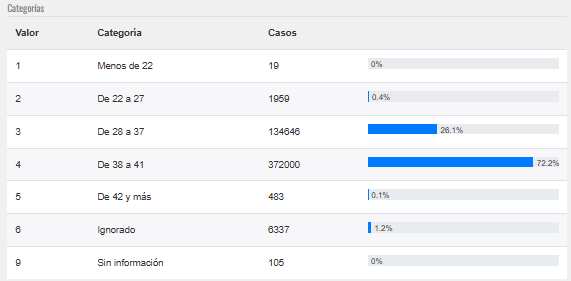

In [ ]:
df2 = tabla1[(tabla1.T_GES != 9) & (tabla1.TALLA_NAC != 9)]

Se observa que el **tiempo de gestación** en la base de datos está asociado con números tales que: **"1"** es correspondiente a "menos de 22 semanas", **"2"** es correspondiente a "De 22 a 27 semanas", etc, por lo que se usa la siguiente línea para tratar estos números como "texto" (string/dtype:object) y no como números que realizan operaciones matemáticas (dtyp: int64).

In [ ]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)


/tmp/ipython-input-3632481200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)#Convertir la columna T_GES a string


,T_GES
COD_DPTO,
23,4
11,4


Se realiza el mismo procedimiento con los datos de la **talla del nacido vivo**.

In [ ]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

/tmp/ipython-input-3678660817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)#Convertir la columna T_NAC a string


,TALLA_NAC
COD_DPTO,
23,5
11,4


# 1.2 Gráficos del Tiempo de Gestación e interpretaciones.

Se asocian los valores string a las variables cualitativas de **tiempo de gestación**.

In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "<22"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == "4"), "T_GES"] = "38-41"
df2.loc[(df2.T_GES == "5"), "T_GES"] = "42<"
df2.loc[(df2.T_GES == "6"), "T_GES"] = "ignorado"

Para probar que el código anterior se ejecuta correctamente en el siguiente código podemos escribir cualquiera de las variables cualitativas y la tabla mostrará los datos correspondientes.

In [ ]:
df2[df2['T_GES'] == '28-37'].head(10)

,T_GES,TALLA_NAC
COD_DPTO,,
5,28-37,4
54,28-37,4
76,28-37,5
63,28-37,4
70,28-37,4
70,28-37,4
47,28-37,4
47,28-37,5
23,28-37,4


**<center> DIAGRAMA DE BARRAS TIEMPO DE GESTACIÓN </center>**

Código para realizar el diagrama de barras correspondiente al **tiempo de gestación**.

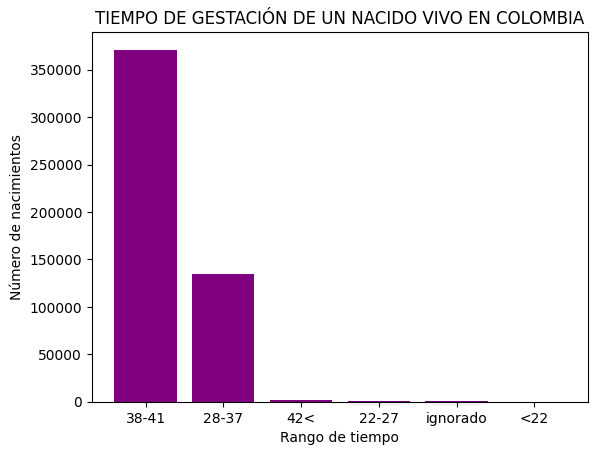

In [ ]:
x_values1 = df2.T_GES.unique()
y_values1 = df2.T_GES.value_counts().tolist()
plt.bar(x_values1, y_values1, color = "purple")
plt.title('TIEMPO DE GESTACIÓN DE UN NACIDO VIVO EN COLOMBIA')
ax = plt.subplot()
ax.set_xlabel('Rango de tiempo')
ax.set_ylabel('Número de nacimientos')
plt.show()


**Interpretación del diagrama de barras:**
El tiempo de gestación de 38 a 41 semans es el rango de tiempo de gestación de un nacido en Colombia donde se tienen más de 350000 nacimientos. En el rango de tiempo de gestación de 28 a 37 semanas se tienen aproximadamente 140000 nacimientos y los tiempo de gestación de 42 y más, de 22 a 27, los que posiblemente no se pudieron registrar y menos de 22 semanas tiene menos de 50000 nacimientos.



Código que muestra los valores exactos del número de nacimientos dentro de cada rango de **tiempo de gestación** en el orden presentado en la tabla.

In [ ]:
sizes = np.array(y_values1)
sizes

array([371090, 134513,   1950,    778,    477,     19])

**Interpretación del código:** El tiempo de gestación de 38 a 41 es el rango de tiempo de gestación de un nacido en Colombia donde que tiene 371090 nacimientos. En el rango de tiempo de gestación de 28 a 37 tiene 134513 nacimientos en y los rangos de tiempo de gestación de 42 y más, de 22 a 27, los que posiblemente no se pudieron registrar y el rango de menos de 22 semanas tienen 1950,778,477 y 19 nacimientos respectivamente.

**<center> DIAGRAMA CIRCULAR TIEMPO DE GESTACIÓN </center>**

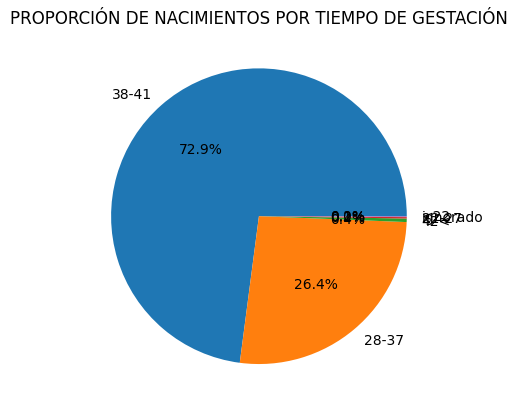

In [ ]:
plt.pie(y_values1, labels = x_values1, autopct='%1.1f%%')
plt.title('PROPORCIÓN DE NACIMIENTOS POR TIEMPO DE GESTACIÓN')
plt.show()

**Interpretación del diagrama circular:**

Interpretación: La mayoría de nacidos vivos en el 2023 tuvieron un tiempo de gestación de 38 a 41 semanas con el 72.9%  y otra parte considerable corresponde al 26.4% en un rango tuvo un tiempo de gestación de 28 a 37 semanas mientras que los nacidos vivos con tiempo de gestación de menos de 22 semanas, de 22 a 27 y los de más de 42 semanas de gestación representan un porcentaje muy pequeño del total de nacimientos.

Suma del número total de nacimientos de los rangos de **tiempo de gestación**.

In [ ]:
len(df2.T_GES)

508827

Código que permite hallar el porcentaje que representa cada variable respecto al total de nacimientos.

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values1]
print(x_values1)
print(porcentaje)

['38-41' '28-37' '42<' '22-27' 'ignorado' '<22']
[72.93048521403149, 26.43590061062011, 0.383234380251048, 0.1529006911975976, 0.09374502532294866, 0.003734078576805083]


**Interpretación:**

Interpretación: La mayoría de nacidos vivos en el 2023 tuvieron un tiempo de gestación de 38 a 41 semanas con un 72,9% del total. Así mismo, otra parte correspondiente al 26.4% tuvo un tiempo de gestación de 28 a 37 semanas, y los nacidos vivos con tiempo de gestación de menos de 22 semanas, de 22 a 27 y los de más de 42 semanas de gestación representan un porcentaje muy pequeño del total de nacimientos con un 0.003%, 0.15% y 0.38% respectivamente.

# 1.3 Gráficos de la Talla del nacido vivo e interpretaciones.

Se asocian los valores string a las variables cualitativas de la talla del nacido vivo.

In [ ]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "<20"
df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20-29"
df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40-49"
df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50-59"
df2.loc[(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "60<"

**<center> DIAGRAMA DE BARRAS TALLA DEL NACIDO VIVO </center>**

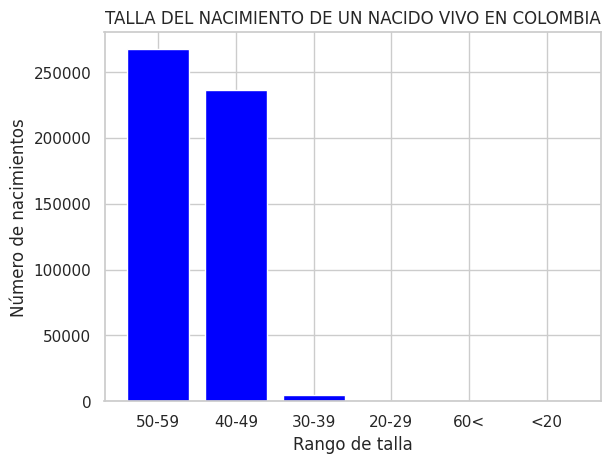

In [ ]:
x_values2 = df2.TALLA_NAC.unique()
y_values2 = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values2, y_values2, color = "blue")
plt.title('TALLA DEL NACIMIENTO DE UN NACIDO VIVO EN COLOMBIA')
ax = plt.subplot()
ax.set_xlabel('Rango de talla')
ax.set_ylabel('Número de nacimientos')
plt.show()


**Interpretación del diagrama de barras:**

La talla del rango 50-59 es la más común de los nacidos vivos en Colombia y donde se tienen alrededor de 260000 nacimientos. En el rango de 40-49 se tienen aproximadamente 230000 nacimientos y sería el segundo más común mientras que las tallas de rango 30-39, 20-29,más de 60 y menos de 20 son las menos comunes con menos de 25000 nacimientos.



Código que muestra los valores exactos del número de nacimientos dentro de cada rango de la talla del nacido vivo en el orden presentado en la tabla.

In [ ]:
sizes = np.array(y_values2)
sizes

array([267220, 236205,   5071,    307,     20,      4])

**Interpretación del código**

La talla del rango 50-59 es la más común de los nacidos vivos en Colombia y donde se tienen 267220 nacimientos. En el rango de 40-49 se tienen 236205 nacimientos y sería el segundo más común mientras que las tallas de rango 30-39, 20-29, más de 60 y menos de 20 son tienen 5071, 307, 20 y 4 nacimientos respectivamente.

**<center> DIAGRAMA CIRCULAR TALLA DEL NACIDO VIVO </center>**

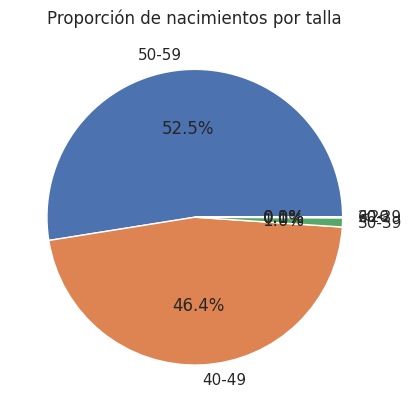

In [ ]:
plt.pie(y_values2, labels = x_values2, autopct='%1.1f%%')
plt.title('Proporción de nacimientos por talla')
plt.show()

**Interpretación:** La mayoría de nacidos vivos en el 2023 tuvieron un talla entre 50-59 y 40-49 con un porcentaje de 52.5% y 46.4% respectivamente. Mientras que las tallas de 30-39, 20-29, más de 60 y menos de 20 representan un porcentaje muy bajo respecto al total de nacimientos.

Suma del número total de nacimientos de los rangos de talla del nacido vivo.

In [ ]:
len(df2.TALLA_NAC)

508827

Código que permite encontrar el porcentaje que representa cada variable respecto al total de nacimientos.

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values2]
print(x_values2)
print(porcentaje)

['50-59' '40-49' '30-39' '20-29' '60<' '<20']
[52.516867225992335, 46.421475275486564, 0.9966059191041355, 0.060334848583113714, 0.0039306090282158765, 0.0007861218056431753]


Aproximadamente el 52.52% de la talla de nacimiento de un nacido vivo en Colombia está en el rango de 50-59, el 46.42% entre 40-49, el 0.996% entre 30-39, 0.060% entre 20-29, 0.003% más de 60, y el 0.0007% mide menos de 20.

# **2.<Center>PROPORCIONES ASOCIADAS A LOS VALORES DE UNA VARIABLE CUALITATIVA: TABLAS DE CONTINGENCIA<center>**

# 2.1 Representación gráfica de una tabla de contingencia.

Los siguientes códigos se usaron para realizar el arreglo matricial entre los elementos de las dos variables cualitativas para estudiar y contar el número de recien nacidos de acuerdo con su talla de nacimiento y su timempo de gestación(definición tabla de contingencia en este caso)

In [ ]:

df2.T_GES, df2.TALLA_NAC = df2.TALLA_NAC.astype(str), df2.T_GES.astype(str)
df2.head(3)

/tmp/ipython-input-2440558153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES, df2.TALLA_NAC = df2.TALLA_NAC.astype(str), df2.T_GES.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
23,38-41,50-59
11,38-41,40-49
11,38-41,40-49


In [ ]:
tabla_cont = pd.crosstab(df2.T_GES, df2.TALLA_NAC)
tabla_cont

TALLA_NAC,20-29,30-39,40-49,50-59,60<,<20
T_GES,,,,,,
22-27,251,1646,50,1,0,2
28-37,44,3357,95455,35657,0,0
38-41,0,46,140106,230919,19,0
42<,0,0,116,360,1,0
<22,11,5,0,1,0,2
ignorado,1,17,478,282,0,0


**<center> REPRESENTACIÓN GRÁFICA DE LA TABLA DE CONTINGENCIA </center>**

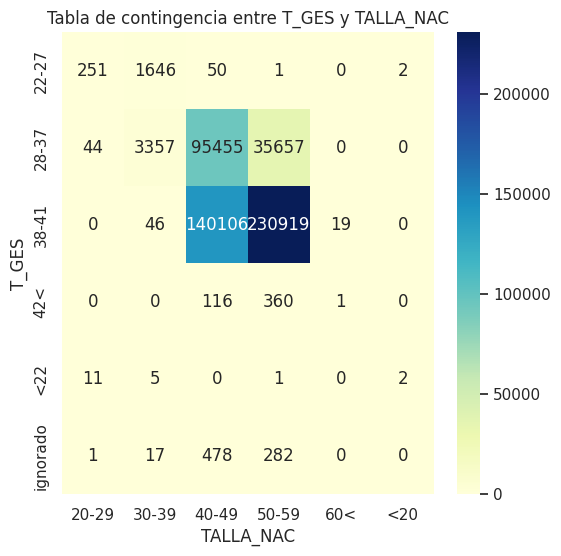

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(tabla_cont, annot=True, fmt= 'd', cmap="YlGnBu", cbar=True)
heatmap.set_title('Tabla de contingencia entre T_GES y TALLA_NAC')
plt.show()

**Interpretación de la gráfica:**

Se puede observar por ejemplo en los valores que se encuentran con colores de tonalidades azules que hubo 230919 nacimientos que se encontraron en el rango de tiempo de gestación de 38-41 semanas con una talla entre 50 y 59. Así mismo 140160 nacimientos con un tiempo de gestación entre 38-41 semanas y una talla de 30-39.

# 2.2 Probabilidades condicionales basadas en la tabla de contingencia e interpretaciones

Código para hallar la intersecciones de las probabilidades

In [ ]:
prob_interseccion_porcentaje = prob_interseccion * 100
print("Tabla de probabilidades de intersección en porcentaje:")
print(prob_interseccion_porcentaje)

Tabla de probabilidades de intersección en porcentaje:
TALLA_NAC     20-29     30-39      40-49      50-59       60<       <20
T_GES                                                                  
22-27      0.049329  0.323489   0.009827   0.000197  0.000000  0.000393
28-37      0.008647  0.659753  18.759814   7.007686  0.000000  0.000000
38-41      0.000000  0.009040  27.535095  45.382615  0.003734  0.000000
42<        0.000000  0.000000   0.022798   0.070751  0.000197  0.000000
<22        0.002162  0.000983   0.000000   0.000197  0.000000  0.000393
ignorado   0.000197  0.003341   0.093942   0.055422  0.000000  0.000000


**Interpretación de probabilidades de intersección en porcentajes halladas:**

1. .   La probabilidad de que un recién nacido mida entre 40-49 cm y tenga un tiempo de gestación entre 42 o más semanas es aproximadamente: 0.022%%.
2.   La probabilidad de que un recién nacido mida entre 30-39 cm y tenga un tiempo de gestación entre 42 o más semanas es casi nula.
3.   La probabilidad de que un recién nacido mida entre 40-49 cm y tenga un tiempo de gestación entre 38 a 41 semanas es aproximadamente: 27.535%.
4. La probabilidad de que un recién nacido mida entre 30-39 cm y tenga un tiempo de gestación entre 38 a 41 semanas es aproximadamente: 0.0009%.
5. La probabilidad de que un recién nacido mida entre 30-39 cm y tenga un tiempo de gestación entre 28 a 37 semanas es aproximadamente: 0.65%.
6. La probabilidad de que un recién nacido mida entre 40-49 cm y tenga un tiempo de gestación entre 28 a 37 semanas es aproximadamente: 18.75%.
7. La probabilidad de que un recién nacido mida entre 40-49 cm y tenga un tiempo de gestación desconocido es aproximadamente= 0.093%.
8. La probabilidad de que un recién nacido mida entre 50-59 cm y tenga un tiempo de gestación entre 38 a 41 semanas es aproximadamente= 45.38%%.

**<center> PROBABILIDAD CONDICIONAL DADO EL TIEMPO DE GESTACIÓN </center>**

In [ ]:
prob_condicional_talla_dado_tges = tabla_cont.div(tabla_cont.sum(axis=1), axis=0)
print("Tabla de probabilidad condicional (TALLA_NAC dado T_GES):")
print(prob_condicional_talla_dado_tges *100 )



Tabla de probabilidad condicional (TALLA_NAC dado T_GES):
TALLA_NAC      20-29      30-39      40-49      50-59       60<        <20
T_GES                                                                     
22-27      12.871795  84.410256   2.564103   0.051282  0.000000   0.102564
28-37       0.032711   2.495670  70.963401  26.508219  0.000000   0.000000
38-41       0.000000   0.012396  37.755262  62.227223  0.005120   0.000000
42<         0.000000   0.000000  24.318658  75.471698  0.209644   0.000000
<22        57.894737  26.315789   0.000000   5.263158  0.000000  10.526316
ignorado    0.128535   2.185090  61.439589  36.246787  0.000000   0.000000


**Interpretación de la probabilidad condicional de TALLA_NAC dado T_GES**

1. Dado que el tiempo de gestación fue entre 38 a 41 semanas, la probabilidad de que la talla al nacer sea entre 50-59 es: 62.227%.
2. Dado que el tiempo de gestación fue entre 38 a 41 semanas, la probabilidad de que la talla al nacer sea entre 40-49 es: 37.75%.
3. Dado que el tiempo de gestación fue entre 28 a 37 semanas, la probabilidad de que la talla al nacer sea entre 40-49 es: 70.963%.
4. Dado que el tiempo de gestación fue entre 22 a 27 semanas, la probabilidad de que la talla al nacer sea entre 40-49 es: 2.56%.
5. Dado que el tiempo de gestación fue entre menos de 22 semanas, la probabilidad de que la talla al nacer sea entre 40-49 es casi nula.

**<center> PROBABILIDAD CONDICIONAL DADA LA TALLA DEL NACIDO VIVO </center>** .

In [ ]:
prob_condicional_tges_dado_talla = tabla_cont.div(tabla_cont.sum(axis=0), axis=1)
print("\nTabla de probabilidad condicional (T_GES dado TALLA_NAC):")
print(prob_condicional_tges_dado_talla *100 )


Tabla de probabilidad condicional (T_GES dado TALLA_NAC):
TALLA_NAC      20-29      30-39      40-49      50-59   60<   <20
T_GES                                                            
22-27      81.758958  32.459081   0.021168   0.000374   0.0  50.0
28-37      14.332248  66.199961  40.411930  13.343687   0.0   0.0
38-41       0.000000   0.907119  59.315425  86.415313  95.0   0.0
42<         0.000000   0.000000   0.049110   0.134720   5.0   0.0
<22         3.583062   0.098600   0.000000   0.000374   0.0  50.0
ignorado    0.325733   0.335240   0.202367   0.105531   0.0   0.0


**Interpretacion de la probabilidad condicional de T_GES dado TALLA_NAC**

1. Dado que la talla al nacer fue de 30 a 39, la probabilidad de que el tiempo de gestación sea 42 o más semanas, es casi nula.
2.  Dado que la talla al nacer fue de 40 a 49, la probabilidad de que el tiempo de gestación sea 38 a 41 semanas, es aproximadamente: 59.31%.
3. Dado que la talla al nacer fue de 40 a 49, la probabilidad de que el tiempo de gestación sea de menos de 22 semanas casi nula.
4. Dado que la talla al nacer fue de 50 a 59, la probabilidad de que el tiempo de gestación sea de 38 a 41 semanas es aproximadamente: 86.41%
5. Dado que la talla al nacer no se conozca, la probabilidad de que el tiempo de gestación sea de menos de 30 a 39 semanas es aproximadamente: 0.33%


**Prueba de hipótesis: chi cuadrado**

$H_0: X$ y $Y$ no están asociadas; son idenpendientes o son homogéneas.

$H_a: X$ y $Y$ están asociadas; no son idenpendientes, es decir, una varibale depende de la otra o no son homogéneas.




**<center> PRUEBA CHI CUADRADO </center>**

In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"el valor de la estadística Chi cuadrado es: {chi}")
print(f"el valor de p es: {valor_p}")

el valor de la estadística Chi cuadrado es: 283302.7467337463
el valor de p es: 0.0




*   Si $p < 0.05$ se rechaza la hipótesis nula.
*   Si $p > 0.05$ no se rechaza la hipótesis nula.

Dado que el valor $p=  0.0$ < 0.05, se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95%. Entonces que existe una asociación significativa entre el tiempo de gestación y la talla de nacimiento de los nacidos vivos en Colombia. Es decir, la talla de nacimiento parece depender del tiempo de gestación.


**<center> COEFICIENTES DE CONTINGENCIA, PHI, Y V DE CRAMER</center>**

In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_v_cramer = math.sqrt(chi/(chi + len(df2.TALLA_NAC)*min(6-1, 6-1)))
print(f"los coeficientes de contingencia, phi y v están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi}, {coeficiente_v_cramer}")

los coeficientes de contingencia, phi y v están respectivamente dados por 0.5980358668183134, 0.5980358668183134, 0.3165401959004801


De acuerdo con, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [link](https://pdfs.semanticscholar.org/7e73/43a5608fff1c68c5259db0c77b9193f1546d.pdf), el tiempo de gestación de un nacido vivo en Colombia y su la talla de nacimiento están moderadamente asociadas según los coeficientes de contingencia y phi, y discretamente asociadas según el coeficiente V de Cramer.

Interpretación general:

*   Talla de nacimiento depende de tiempo de gestación.
*   Talla de nacimiento y tiempo de gestación no son homogéneas.
*   Tiempo de  y TALLA_NAC están moderadamente asociadas.

Donde ____ = nula ($chi, \phi, V \approx 0$), ____ = insignificantemente ($0 < chi, \phi, V < 0.2$), ____ = discretamente ($0.2 < chi, \phi, V < 0.4$), ____ = moderadamente ($0.4 < chi, \phi, V < 0.6$), ____ = sustancialmente ($0.6 < chi, \phi, V < 0.8$) y ____ = fuertemente ($0.8 < chi, /phi, V < 1$)






**ANÁLISIS DE DATOS**

**¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?**

El análisis del comportamiento del período gestacional de la variable nacidos vivos en Colombia muestra que la tasa media es de aproximadamente 37,5 semanas, mientras que la mediana y moda están entre 38 y 41 semanas, este dato pertenece a lo que se denominará rango 4; lo que indica que la mayoría de los nacimientos ocurren a término. La desviación estándar es de aproximadamente 3,5 semanas, lo que refleja cierta variación, aunque la mayor concentración de nacimientos se produce dentro de un rango estrecho. El intervalo gestacional total es de 22 a 43 semanas y cubre tanto los nacimientos extremadamente prematuros como los postérmino. Por otro lado, La distribución de los datos muestra una asimetría negativa, ya que la mayoría de los nacimientos se concentran en las últimas semanas del embarazo, con una menor proporción de casos en semanas tempranas. También se observa una curtosis pronunciada, con la mayoría de los nacimientos agrupados en torno a un valor central. En cuanto a la frecuencia, el 72,9% de los partos se producen entre las 38 y 41 semanas (rango 4), mientras que el 26,4% corresponde a partos prematuros entre las 28 y 37 semanas (rango 3). Los nacimientos muy prematuros y postérmino son raros y juntos representan menos del 1% del total (rango 1, 2,5). Esto muestra una tendencia general hacia los embarazos normales, aunque con una proporción importante de embarazos prematuros.



**¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia (TALLA_NAC)?**

El gráfico "Tiempo de gestación de un recién nacido en Colombia" muestra la comparación entre el período de gestación (eje x) y el número de nacimientos (eje y).  Al observar el histograma se puede notar que la mayoría de los nacimientos ocurren en el intervalo de 3 a 4, donde el ivervalo 3 abarca de 28 a 37 semanas de embarazo, mientras que el intervalo 4 abarca de 38 a 41 semanas. Ademá, es importante mencionar que aunque la mayor parte de los nacimientos se concentran en estos dos intervalos, la diferencia entre ellos es significativa, alcanzando los 210000 nacimientos, dado que el intervalo 4 registra aproximandamente 350000 nacimientos, mientras que el intervalo 3 presenta cerca de 140000 nacimientos. Igualmente vale la pena resaltar que el intervalo 1 (más de 22 semanas), 2 (de 22 a 27 semanas), 5 (menos de 42 semanas) tienen menos de 50000 nacimientos, lo cual explica su falta de visibilidad en el gráfico.

Asimismo, al analizar los mismos datos a travez de un gráfico de circular que muetra la distribución de nacimientos según el tiempo de gestación, se observa claramente que el intervalo 3 (ente 28 y 37 semanas), con un 26,4 % de los casos, y 4 (38 a 41 semanas), con un 72,9 %, son los más frecuentes. En conjunto, estos dos intervalos constituyen el 99,3 % del total de nacimientos, lo que sugiere que la mayoría de los partos ocurren dentro de este rango de semanas.Al mismo tiempo, Los intervalos 1 (menos de 22 semanas), 2 (22 a 27 semanas) y 5 (42 semanas o más) tienen una ocurrencia muy baja, lo cual apenas suma un total de un 0,7 % de todos los casos. Esta escasa aparición implica que los partos dentro de estos rangos son raros o inusuales en comparación con el comportamiento general de la muestra.

Por otra parte, al revisar el gráfico titulado "Talla del nacimiento de un nacido vivo en Colombia", se identifican seis rangos que representan la talla del recién nacido en centímetros. Estos se definen de la siguiente Forma: el rango 1 corresponde a tallas mayores a 20 cm; el rango 2, de 20 a 29 cm; el rango 3, de 30 a 39 cm; el rango 4, de 40 a 49 cm; el rango 5, de 50 a 59 cm; y finalmente, el rango 6 corresponde a tallas menores de 60 cm. Con base a esta distribución y en la información del gráfico analizado, se puede notar que el intervalo 5 es la talla más común en los recién nacidos, con un total de 267220 casos. En segundo lugar, se encuentra el intervalo 4, que tiene un total 236205 nacimientos, con una diferencia de 31015 la cual muestra una variación significativa entre ambos. Desde este punto, la frecuencia disminuye de manera considerable: el intervalo 3 presenta una baja notable en comparación con los anteriores intervalos, con 5071 nacimientos registrados. Además, al analizar los intervalos 1, 2, 3 y 6, podemos ver que juntas no llegan a superar los 50.000 casos,  lo que sugiere que las tallas en estos grupos son poco frecuentes en la población estudiada.

Siguiendo con el análisis, se revisa ahora el gráfico circular titulado “Proporción de nacimientos por talla”, donde se presentan los mismos datos mencionados anteriormente, pero en formato de porcentajes. En este gráfico, se observa que el rango 5 abarca el 52,5 % de los nacimientos registrados, mientras que el rango 4 cuenta con el 46,4 % del total. Mientras que las tallas de 30-39, 20-29, más de 60 y menos de 20 representan un porcentaje muy bajo respecto al total de nacimientos. Además, se destaca que los intervalos 4 y 5 juntos suman en total el 98,9 % de los nacimientos, por tal motivo, estas tallas corresponden a las más comunes entre los recién nacidos en el país. Por el contrario, los intervalos 1, 2, 3 y 6, jutos suman apenas en total el 1,1 % de los datos, lo que equivale a 5.402 casos sobre un total de 508.827 nacimientos. Esta proporción tan baja que se puede observar su falta de visivilidad en la grafica, de la cual se puede inferir que estos cason son extremadamente poco frecuentes.

Por otro lado, a partir de la tabla de contingencia entre el tiempo de gestación (T_GES) y la talla al nacer (TALLA_NAC), se lleva a cabo un estudio de las probabilidades de intersección entre las dos variables, presentadas en porcentaje. Este estudio facilita la identificación de las combinaciones más comunes entre el tiempo de gestación y la talla del recién nacido, además de detectar patrones inusuales dentro de la muestra analizada. Así, la mayor probabilidad se observa en los recién nacidos con una talla entre 50 y 59 cm (intervalo 5) y que han tenido un tiempo de gestación de entre 38 a 41 semanas (intervalo 4), alcanzando un porcentaje de 45,38 %, lo que indica de forma clara que esta es la combinación más frecuente en la población estudiada. En un segundo lugar, se presenta la combinación de talla entre 40 y 49 cm (intervalo 4) junto con un tiempo de gestación de 38 a 41 semanas, con una probabilidad de 27,5 %. En total, estas dos categorías suman más del 72 % de los casos, lo que demuestra una notable concentración de nacimientos en estos rangos.

A continuación, se mencionan otras combinaciones con frecuencias notables, aunque considerablemente inferiores. Por ejemplo, la probabilidad de que un bebé recién nacido tenga una altura de entre 30 y 39 cm y haya sido gestado entre 38 y 41 semanas es del 18,7 %, mientras que la misma altura con un periodo de gestación de 42 semanas o más muestra una probabilidad del 7 %.Asimismo, Las combinaciones menos frecuentes reflejan circunstancias inusuales dentro del conjunto de datos. Entre ellas, se destaca la probabilidad de que un recién nacido tenga una altura entre 30 y 39 cm junto con un periodo de gestación que varía entre 28 y 37 semanas, lo cual representa el 0,65 % de los casos. Aún más escasa es la probabilidad de encontrar una estatura entre 40 y 49 cm con un tiempo de gestación en el mismo intervalo, que se sitúa solo en el 0,009 %. Por último, la coincidencia entre una estatura de 40 a 49 cm y un tiempo de gestación que se clasifica como "desconocido" solo representa el 0,003 %, sugiriendo un número casi irrelevante de casos.

En conclusión, el análisis de estas probabilidades de intersección permite afirmar que la mayoría de los nacimientos se agrupan dentro de los rangos de tamaño y tiempo de gestación normales, mientras que las combinaciones que se apartan de estos valores presentan frecuencias muy bajas, lo que podría señalar condiciones clínicas específicas o circunstancias excepcionales.


**¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una
variable de la otra o qué tan asociadas están ambas?**

Teniendo en cuenta el estudio realizado en el código, se indica que las variables "tiempo de gestación" (T_GES) y "talla de nacimiento" (TALLA_NAC) están asociadas. La prueba de chi-cuadrado proporcionó un valor p sumamente bajo (0.0), lo que llevó a rechazar la hipótesis nula de independencia. Esto implica que la talla de un recién nacido al momento del parto está influenciada por el tiempo que estuvo en gestación.
La fuerza de la asociación se evaluó utilizando los coeficientes de contingencia, phi y V de Cramer. De acuerdo con la interpretación basada en la bibliografía de Landis y Koch:

Los coeficientes de contingencia y phi indican que las variables están moderadamente asociadas.
El coeficiente V de Cramer sugiere que las variables están discretamente asociadas.



**Conclusiones:**

Según el análisis de datos realizado, podemos concluir que:

1. El tiempo de gestación más habitual en los nacimientos vivos en Colombia se encuentra entre las 38 y 41 semanas, abarcando la mayor parte de los casos. Una parte importante de los partos se da entre las 28 y 37 semanas, mientras que los nacimientos que son muy prematuros o que se dan postérmino son poco frecuentes.

2. Las medidas al nacer más comunes en los recién nacidos en Colombia se encuentran en los intervalos de 50-59 cm y 40-49 cm. Estos dos intervalos abarcan la gran mayoría de los nacimientos, siendo las medidas que están fuera de estos intervalos bastante menos comunes.

3. La asociación entre T_GES y TALLA_NAC: La prueba de chi-cuadrado reveló una asociación estadísticamente significativa entre el tiempo de gestación y la talla al nacer, la cual sugiere que la talla de un recién nacido está vinculada a su tiempo de gestación.

4. Los coeficientes de contingencia y phi indican que la asociación entre el tiempo de gestación y la talla de nacimiento es moderada. El coeficiente V de Cramer refleja una asociación discreta. En conclusión, se observa que existe una relación entre ambas variables, donde la talla de nacimiento tiende a variar según el tiempo de gestación.

***Bibliografía: ***

Castillo, I., Reyes, M., Zorro, R. & Tellez, M. (2022). *Estadísticas Vitales - EEVV* - 2022. DANE.
https://microdatos.dane.gov.co/index.php/catalog/807/study-description
159-174.


Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data.
biometrics
https://www.semanticscholar.org/paper/The-measurement-of-observer
agreement-for-data.-Landis
